<a href="https://colab.research.google.com/github/Mombinjenga/Rand_Dollar_Forecasting/blob/main/Rand_Dollar_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [11]:
uploaded = files.upload()

df = pd.read_excel('Rand_US_Dailly_Exchange_Rate_May_24_-May_25.xlsx')
df.columns = ['Date', 'Exchange_Rate']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
print(df.head())

Saving Rand_US_Dailly_Exchange_Rate_May_24_-May_25.xlsx to Rand_US_Dailly_Exchange_Rate_May_24_-May_25.xlsx
        Date  Exchange_Rate
0 2023-05-01        18.2893
1 2023-05-02        18.3655
2 2023-05-03        18.4559
3 2023-05-04        18.2151
4 2023-05-05        18.2712


In [12]:
#  Forecast next 30 days

df['Day_Index'] = np.arange(len(df))

# Fit a simple trend line
z = np.polyfit(df['Day_Index'], df['Exchange_Rate'], 1)
p = np.poly1d(z)

# Predict next 30 days
future_index = np.arange(len(df), len(df) + 30)
future_dates = pd.bdate_range(start=df['Date'].iloc[-1], periods=31)[1:]
future_rates = p(future_index)

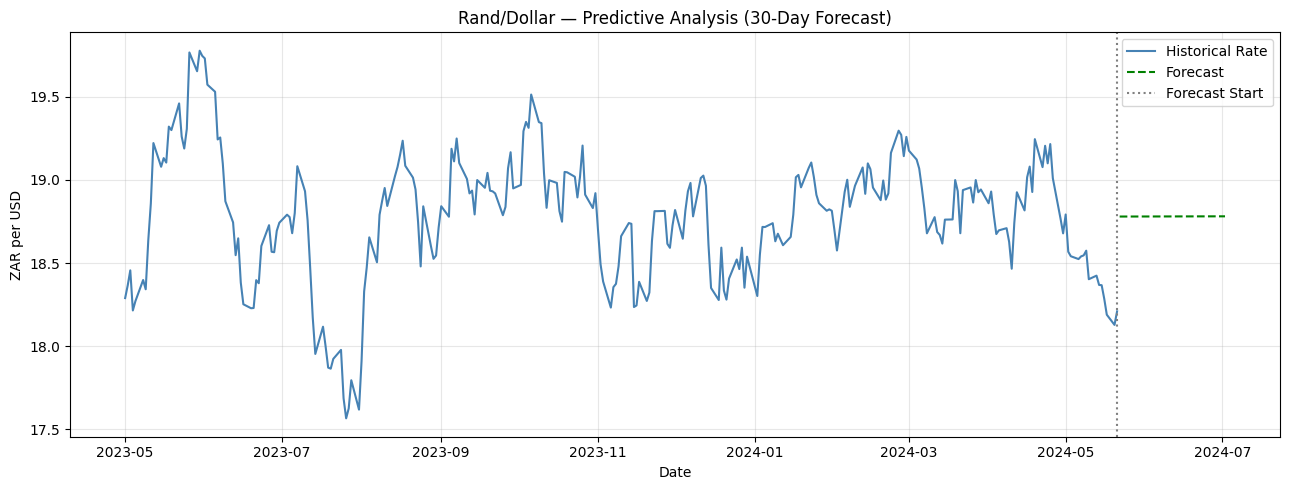

In [13]:
# Visualization

plt.figure(figsize=(13, 5))
plt.plot(df['Date'], df['Exchange_Rate'], color='steelblue', label='Historical Rate')
plt.plot(future_dates, future_rates, color='green', linestyle='--', label='Forecast')
plt.axvline(x=df['Date'].iloc[-1], color='gray', linestyle=':', label='Forecast Start')
plt.title('Rand/Dollar — Predictive Analysis (30-Day Forecast)')
plt.xlabel('Date')
plt.ylabel('ZAR per USD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()